# Lecture 5: Data Arrays and Data Visualization

## Contents
- [Imports](#section1)
- [Array data structure](#section2)
    - [Concepts](#subsection2.1)
    - [NumPy arrays](#subsection2.2)
- [Data visualization using the Matplotlib package](#section3)
    - [Functions <code>plot()</code>, <code>scatter()</code>, and <code>bar()</code>](#subsection3.1)
    - [Configuration of plots and figures](#subsection3.2)
    - [Labeling plots and the function <code>legend()</code>](#subsection3.3)
- [Case studies](#section4)
    - [Draw an 'elephant' with four parameters](#subsection4.1)
    - [Daily stock returns](#subsection4.2)

## Imports <a id="section1"></a>

In all future lectures, we will follow the PEP 8 Coding Style Guide to import all packages at the top of the Jupyter file. **Please make sure that you run the first code cell to import necessary packages before you run the subsequent code**. 

In [1]:
import numpy as np                  # Import the NumPy package for array-based data
import matplotlib.pyplot as plt     # Import the data visualization package Matplotlib

## Array data structure <a id="section2"></a>

### Concepts <a id="subsection2.1"></a>
In computer science, an array data structure, or simply an **array**, is a data structure consisting of a collection of elements (values or variables). These elements can be accessed via array indices or keys. Apparently, compound data types like <code>range</code>, <code>list</code>, <code>tuple</code>, and <code>dict</code> fall into this category and in Python they are also referred to as **array-like** objects. For other data types, like<code>int</code>, <code>float</code>, <code>bool</code>, each object has only a single value. These data types are referred to as **scalars**.

The table below is an example of a **one-dimensional** array which represents six students' final exam marks. Clearly the length of the array is six and each number can be accessed by a given index.

|||||||
|:--|:--|:--|:--|:--|:--|
|61 | 52.5| 71 |32.5 | 68 | 64 |

If we want to show the final exam results in terms of marks for each component, we could use a **two-dimensional** array where the rows are used to indicate different students, and columns are used to represent questions of the final exam, as the following example.

| | | |
|:----:|:-----:|:-----:|
| 18 | 26  | 17 |
| 25 | 15.5| 12 |
| 24 | 27  | 20 |
| 10 | 5.5 | 17 |
| 27 | 26  | 15 |
| 22 | 21  | 21 |

It can be seen that the shape of the two-dimensional array is specified by two numbers: the row number and the column number. In order to access a number, we also need to provide the row index and the column index. 

From these two examples, we may generalize the features of an $N$-dimensional array as follows.

|Dimension Number | Shape | Indexing | Number of Items |
|:----|:------|:------|:-----|
| 1 | length | one index | length |
| 2 | rows and columns | row index and column index | row $\times$ column |
| 3 | height and width and thickness | indices for height, width, and thickness | height $\times$ width $\times$ thickness |
| $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$|

The generalized idea is that an $N$-dimensional array needs $N$ numbers to specify its shape, and $N$ indices to access one item. Instead of calling these dimensions 'length', 'row', 'column', etc, we also generalize these names into axis 0, axis 1, axis 2, ..., as shown by the graph below. Clearly, there are $N$ axes for an $N$-dimensional array.

<img src="https://www.w3resource.com/w3r_images/numpy-1d2d3d-array.png" width=500>

In this course, we will focus on one-dimensional and two-dimension arrays. Arrays with three or higher dimensions will not be covered as they are not used as often in data analysis. 

### NumPy arrays <a id="subsection2.2"></a>

NumPy (short for Numerical Python) is a widely used package for scientific computing and it provides
a data type called <code>numpy.ndarray</code> to efficiently store and operate data formatted as arrays.

#### Create arrays from Python lists
The <code>numpy.ndarray</code> objects can be created from Python lists by using the function <code>array()</code> imported from the NumPy package. Please note that the standard way of importing the package <code>numpy</code> is to rename it as <code>np</code>, so we will use <code>np</code> in the subsequent code.

In [12]:
array_1d = np.array([61, 52.5, 71, 32.5, 68, 64])   # This is a 1D array
array_2d = np.array([[18, 26, 17], 
                     [25, 15.5, 12], 
                     [24, 27, 20],
                     [10, 5.5, 17],
                     [27, 26, 15],
                     [22, 21, 21]])                 # This is a 2D array

In [16]:
array_2d.size

18

The one-dimensional array is created from an ordinary list, and it has many features as an ordinary list. A two-dimensional array can be created from a nested list, and each inner list represents a row of the array. We can verify the data type of <code>array_1d</code> and <code>array_2d</code> by the following code.

In [3]:
print(type(array_1d))
print(type(array_2d))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


There are some other important information about the array can be retrieved by the following **attributes**:
- <code>ndim</code> Dimension number
- <code>shape</code> Shape of the array, given as a tuple
- <code>size</code> Number of data items
- <code>dtype</code> Data type of items

In [4]:
# Attributes of the one-dimensional array

print('Dimension number:     ', array_1d.ndim)
print('Array shape:          ', array_1d.shape)
print('Number of data items: ', array_1d.size)
print('Data type of items:   ', array_1d.dtype)

Dimension number:      1
Array shape:           (6,)
Number of data items:  6
Data type of items:    float64


The shape of an array is always given as a <code>tuple</code>, even for one-dimensional arrays. 

In [5]:
# Attributes of the two-dimensional array

print('Dimension number:     ', array_2d.ndim)
print('Array shape:          ', array_2d.shape)
print('Number of data items: ', array_2d.size)
print('Data type of items:   ', array_2d.dtype)

Dimension number:      2
Array shape:           (6, 3)
Number of data items:  18
Data type of items:    float64


Please note that the data type <code>float64</code> is one of the floating point number type used in the NumPy package. In this course, we do not differentiate it from the built-in Python data type <code>float</code>. Also notice that for an array, it has only one <code>dtype</code>, which implies that all data items in the array must be the same type. 

#### Create special NumPy arrays
The NumPy package also provides a few functions to create special arrays, as demonstrated by the following code segments. 

In [6]:
ones_2d = np.ones(shape=(3, 5))     # Create a 3*5 array with all items to be ones
ones_2d

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [7]:
zeros_1d = np.zeros(shape=5)        # Create an all zero array with the length to be 5
zeros_1d

array([0., 0., 0., 0., 0.])

In [8]:
range_array = np.arange(2, 5, 0.5)  # Create an array with start=2, stop=5, and step=0.5
range_array

array([2. , 2.5, 3. , 3.5, 4. , 4.5])

The function <code>np.arange</code> is very similar to the <code>range</code> function we learned in previous lectures. A sequence of numbers are determined according to the values of <code>start</code>, <code>stop</code>, and <code>step</code>, and the same default values could be applied to these arguments if they are not specified. The only difference is that 1) the output is an <code>numpy.ndarray</code> type object; and 2) numbers in the array could be fractional numbers but the <code>range</code> function only allows integers.

#### Indexing and slicing of arrays
The indexing and slicing of <code>numpy.ndarray</code> are very similar to the built-in compound data types. The only difference is that we need two indices in the same bracket to access a two-dimensional array, as the examples below.

In [9]:
array_1d = np.array([61, 52.5, 71, 32.5, 68, 64])   # This is a one-dimensional array
array_2d = np.array([[18, 26, 17], 
                     [25, 15.5, 12], 
                     [24, 27, 20],
                     [10, 5.5, 17],
                     [27, 26, 15],
                     [22, 21, 21]])                 # This is a two-dimensional array

print(array_1d[1])                                  # The second item of the 1d array
print(array_2d[0, 1])                               # Two indices for a 2d array
print(array_1d[2:])                                 # Slicing for 1d array
print(array_2d[3:, :])                              # Slicing for 2d array
print(array_2d[[0, 2, 1]])                          # Take the 1st, 3rd, and 2nd rows

52.5
26.0
[71.  32.5 68.  64. ]
[[10.   5.5 17. ]
 [27.  26.  15. ]
 [22.  21.  21. ]]
[[18.  26.  17. ]
 [24.  27.  20. ]
 [25.  15.5 12. ]]


For a two-dimensional array, if the column index is not specified, the indexing or slicing expression takes all columns. 

The <code>numpy.ndarray</code> objects are also **mutable**, meaning that we can change some data items by referring to their indices.

In [10]:
array_2d[2, :] = np.array([25, 28, 21])
array_2d

array([[18. , 26. , 17. ],
       [25. , 15.5, 12. ],
       [25. , 28. , 21. ],
       [10. ,  5.5, 17. ],
       [27. , 26. , 15. ],
       [22. , 21. , 21. ]])

In [11]:
array_1d[2] = 74
array_1d

array([61. , 52.5, 74. , 32.5, 68. , 64. ])

#### Element-wise arithmetic operations on arrays
NumPy implements mathematical functions such that, when a function acts on an array, the mathematical operation is applied to each element in the array. In other words, all arithmetic operations are element-wise on arrays. 

In [12]:
array_2d = np.array([[1, 2],    
                     [2, 3.5],     
                     [5, 6.5]])     # Create a two-dimensional array  

print(array_2d + 3)                 # Add one scalar to each element
print(array_2d * 2)                 # Each element is multiplied by a scalar
print(array_2d + array_2d)          # Element-wise addition
print(array_2d * array_2d)          # Element-wise multiplication

[[4.  5. ]
 [5.  6.5]
 [8.  9.5]]
[[ 2.  4.]
 [ 4.  7.]
 [10. 13.]]
[[ 2.  4.]
 [ 4.  7.]
 [10. 13.]]
[[ 1.    4.  ]
 [ 4.   12.25]
 [25.   42.25]]


This feature brings about huge benefit when dealing with data. We will use the following examples to demonstrate that. 

<div class="alert alert-block alert-success">
<b>Example 1:</b> <b>usd</b> is a list containing five money transactions in US dollars. Transfer each transaction into Singapore dollars. 
</div>

In this case, the coding task would be much easier if we do the calculation on a  <code>numpy.ndarray</code> rather than on the list. 

In [13]:
usd = [2, 3.60, 2.05, 13.50, 18.90]
exchange_rate = 1.37

usd_array = np.array(usd)               # Create a numpy.ndarray object from the list
sgd_array = usd_array * exchange_rate   # Element-wise multiplication

print(sgd_array)

[ 2.74    4.932   2.8085 18.495  25.893 ]


In the code cell above, we created a <code>numpy.ndarray</code> type variable named <code>usd_array</code> from the list <code>usd</code>. The next line performs element-wise multiplication where each item in the array are multiplied by the scalar <code>exchange_rate</code>. Compared with using a <code>for</code> loop or list comprehension, as we discussed in previous lectures, such an operation is
1. More concise;
2. Easier to read;
3. Faster to execute, especially for arrays with huge number of items. 

<div class="alert alert-block alert-success">
    <b>Example 2:</b> Following the story in previous case studies, the discrete distribution information of two types of newspapers is stored in a two-dimensional array <b>distr</b>. The first row represents the probabilities of each weather condition, the second and third rows give the corresponding newspaper demands. Calculate the 1) the expected newspaper demands; 2) the standard deviations of newspaper demands; and 3) the expected total profit, where the parameters are given in previous case studies. 
</div>
The array <code>distr</code> is constructed as follows.

In [14]:
distr = np.array([[0.315, 0.226, 0.289, 0.087, 0.083],
                  [560, 530, 389, 202, 278], 
                  [533, 486, 386, 234, 263]])

The code cell below calculates the expected value and standard deviation of the random newspaper demand. 

In [15]:
exp1 = np.sum(distr[0] * distr[1])                  # Expected demand of paper1
var1 = np.sum(distr[0] * (distr[1] - exp1)**2)      # Variance of paper1 demand
std1 = var1 ** 0.5                                  # Standard deviation of paper1 demand

print('Expected demand: {0:0.3f}'.format(exp1))
print('Standard deviation: {0:0.3f}'.format(std1))

Expected demand: 449.249
Standard deviation: 118.908


In [16]:
exp2 = np.sum(distr[0] * distr[2])                  # Expected demand of paper2
var2 = np.sum(distr[0] * (distr[2] - exp2)**2)      # Variance of paper2 demand
std2 = var2 ** 0.5                                  # Standard deviation of paper2 demand

print('Expected demand: {0:0.3f}'.format(exp2))
print('Standard deviation: {0:0.3f}'.format(std2))

Expected demand: 431.472
Standard deviation: 101.316


The expected profit can be calculated by the code below.

In [17]:
cost = np.array([0.6, 0.8])
price = np.array([1.0, 1.15])
order = np.array([430, 380])

exp_sold1 = np.sum(distr[0] * np.minimum(order[0], distr[1]))
exp_sold2 = np.sum(distr[0] * np.minimum(order[1], distr[2]))
exp_profit = (price[0]*exp_sold1 + price[1]*exp_sold2) - np.sum(order*cost)
print('Expected profit: ${0:0.2f}'.format(exp_profit))

Expected profit: $234.92


#### Broadcasting
In the previous subsection, we have discussed arithmetic operations on 
1. A scalar and an arbitrary shape array;
2. Two arrays with the same shape.

Some special cases of arithmetic operations between arrays with different shapes are allowed in Python. Such operations follow the rules referred to as **broadcasting**. You can think broadcasting as to duplicate or to 'broadcast' the smaller array across the larger array so that they have compatible shapes, then the element-wise calculations can be conducted. A few examples are given below.

<img src="https://www.astroml.org/_images/fig_broadcast_visual_1.png" width=500pt>

In [18]:
np.arange(3) + 5

array([5, 6, 7])

In [19]:
np.ones((3, 3)) + np.arange(3)

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [20]:
np.arange(3).reshape((3, 1)) + np.arange(3)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

You may also notice that the operation between a scalar and an array is a special case of broadcasting. Besides the addition operator, the idea of broadcasting can be applied to other arithmetic operators such as multiplication, division, power, etc. Since we only consider at most two-dimensional arrays, you just need to understand broadcasting operations where the smaller array has only one row or one column.

#### Functions and Array methods

The NumPy package provides many commonly used mathematical functions, such as <code>exp()</code> for exponential function, <code>log()</code> for natural logarithm, <code>square()</code> for squares, <code>power</code> for powers etc. Like arithmetic operations, these functions also work element-wise on arrays, as shown by the following examples.

In [21]:
print(np.log(3))                    # Natural logarithm of 3
print(np.exp(np.arange(4)))         # Exponential of 0, 1, 2, 3
print(np.square(np.arange(3)))      # Squares of 0, 1, 2
print(np.power(np.arange(3), 3))    # Cubes of 0, 1, 2

1.0986122886681098
[ 1.          2.71828183  7.3890561  20.08553692]
[0 1 4]
[0 1 8]


Similar to other Python data types, there are also many methods associated with NumPy arrays. For example we may use the method <code>sum()</code> to find the summation of all items. Methods <code>max()</code> and <code>min()</code> can be used to search for the maximum and the minimum item in the array.

In [22]:
array_2d = np.array([[1, 2],    
                     [2, 3.5],     
                     [5, 6.5]])     # Create a two-dimensional array  

print(array_2d.sum())               # Sum of all item
print(array_2d.max())               # The maximum item in the array
print(array_2d.min())               # The minimum item in the array

20.0
6.5
1.0


Besides considering all items in the array (default case), we can also specify an axis along which these measures are calculated. Some examples are given as follows.

In [23]:
print(array_2d.sum(axis=0))    # For each column, sum of elements along rows
print(array_2d.sum(axis=1))    # For each row, sum of elements along columns
print(array_2d.max(axis=0))    # The maximum elements of each column (along rows)
print(array_2d.min(axis=1))    # The minimum elements of each row (along columns)

[ 8. 12.]
[ 3.   5.5 11.5]
[5.  6.5]
[1. 2. 5.]


Next, we will use **Example 2** to demonstrate how the code can be simplified by using array methods and broadcasting operations. 

In [24]:
exp_d = (distr[0] * distr[1:]).sum(axis=1)
exp_d

array([449.249, 431.472])

In [25]:
var_d = (distr[0] * (distr[1:] - exp_d.reshape((2, 1)))**2).sum(axis=1)
std_d = var_d ** 0.5
std_d

array([118.90763222, 101.3157797 ])

In [26]:
order = np.array([430, 380])
exp_sold = (distr[0] * np.minimum(order.reshape((2, 1)), distr[1:])).sum(axis=1)
exp_sold

array([385.699, 357.587])

In [27]:
cost = np.array([0.6, 0.8])
price = np.array([1.0, 1.15])
exp_profit = (price*exp_sold - cost*order).sum()
print('Expected profit: ${0:0.2f}'.format(exp_profit))

Expected profit: $234.92


In the previous solution, we calculated the expectations and standard deviations of demands separately for two types of newspapers. The new solution applies the broadcasting operation and the <code>sum()</code> method, so that these measures can be calculated altogether as arrays. When you have many types of newspapers to sell (multi-product newsvendors problem), the second method would be more convenient and concise compared with running all calculations in loops. 

## Data visualization using the Matplotlib package <a id="section3"></a>

In this course, we will focus on Matplotlib, a powerful multi-platform data visualization library built on NumPy arrays. The syntax of Matplotlib is relatively simpler, and once you are familiar with this package, you could explore data visualization packages that are 'fancier', such as [Plotly](https://plotly.com/) and [seaborn](https://seaborn.pydata.org/)

The standard way of importing the <code>matplotlib.pyplot</code> module is to rename it as <code>plt</code>, so we will use the name <code>plt</code> in subsequent code. 

### Functions <code>plot()</code>, <code>scatter()</code>, and <code>bar()</code> <a id="subsection3.1"></a>
Among many graphs and visuals for displaying data information, we will focus on 
1. Line plots
2. Scatter plots
3. Bar chart

in this section because they work for the majority of your needs. These data visuals can also be created in very similar ways, as demonstrated by the next example. 

<div class="alert alert-block alert-success">
<b>Example 3:</b> Plot the graph of an exponential function $y=\exp(x)$, where $x=0, 1, 2, 3, 4, 5$. 
</div>
The line plot is usually used to display the continuous trend, and it can be created by the code below.

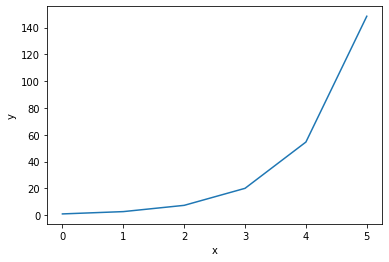

In [28]:
step = 1
x = np.arange(0, 5+step, step)      # An array 0, 1, 2, 3, 4, 5
y = np.exp(x)                       # An array of exp(0), exp(1), ..., exp(5)

plt.plot(x, y)                      # Specify the line plot by the x and y data
plt.xlabel('x')                     # Label for x data
plt.ylabel('y')                     # Label for y data
plt.show()                          # Ready for display (optional for Jupyter)

In cases that we want to display a smooth curve for the exponential function, we just need to set the variable <code>step</code> to a very small number, like 0.01.

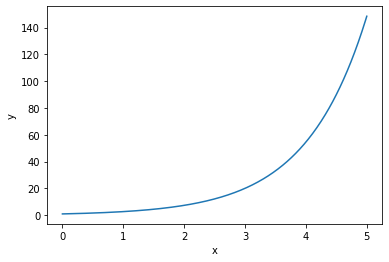

In [29]:
step = 0.01
x = np.arange(0, 5+step, step)      # An array 0, 0.01, 0.02, ..., 4.99, 5
y = np.exp(x)                       # An array of exp(0), exp(0.01), ..., exp(5)

plt.plot(x, y)                      # Specify the line plot by the x and y data
plt.xlabel('x')                     # Label for x data
plt.ylabel('y')                     # Label for y data
plt.show()                          # Ready for display (optional for Jupyter)

If the diagram is aimed at showing discrete data points, then the scatter plot is preferred.

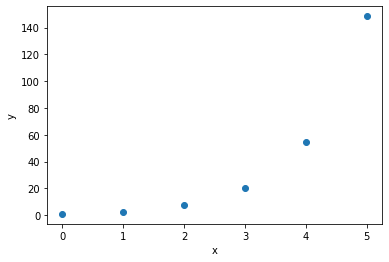

In [30]:
step = 1
x = np.arange(0, 5+step, step)      # An array 0, 1, 2, 3, 4, 5
y = np.exp(x)                       # An array of exp(0), exp(1), ..., exp(5)

plt.scatter(x, y)                   # Specify the scatter plot by the x and y data
plt.xlabel('x')                     # Label for x data
plt.ylabel('y')                     # Label for y data
plt.show()                          # Ready for display (optional for Jupyter)

It can be seen that the <code>scatter()</code> function works similarly as the <code>plot()</code> function, where we specify the x and y data by the first (keyword <code>x</code>) and the second (keyword <code>y</code>) arguments.  

Alternatively, we can use the bar graph to show discrete data values. 

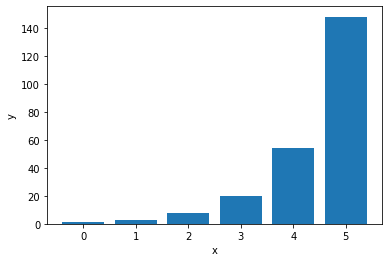

In [31]:
step = 1
x = np.arange(0, 5+step, step)      # An array 0, 1, 2, 3, 4, 5
y = np.exp(x)                       # An array of exp(0), exp(1), ..., exp(5)

plt.bar(x, y)                       # Specify the bar chart by the x and y data
plt.xlabel('x')                     # Label for x data
plt.ylabel('y')                     # Label for y data
plt.show()                          # Ready for display (optional for Jupyter)

The syntax of specifying the x and y data is also quite similar, except that the keyword of the second argument is <code>height</code> instead of <code>y</code>. 

You may explore other information of these three functions by the <code>help()</code> information. It is mentioned in the function docstring that the x and y data are given as 'array-like' data types, so they can also be other compound data types, such as <code>list</code>, <code>range</code>, or <code>tuple</code>. However, we usually prefer using NumPy arrays in these visualization functions because it is more convenient to conduct element-wise calculations.

In [32]:
# Write your code here

### Configuration of plots and figures <a id="subsection3.2"></a>
In real applications, we often need to adjust some attributes of a plot, such as the color and style of lines, size and opacity of scattered dots, or the width or bars. All these attributes can be specified by keyword arguments when calling these visualization functions. 

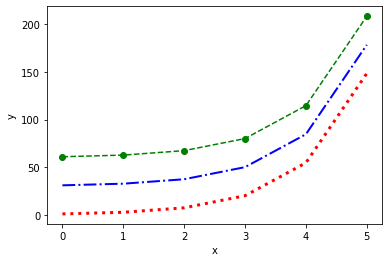

In [33]:
step = 1
x = np.arange(0, 5+step, step)      # An array 0, 1, 2, 3, 4, 5
y = np.exp(x)                       # An array of exp(0), exp(2),..., exp(5)

plt.plot(x, y,                      # Specify the line plot by the x and y data
         linewidth=3,               # Line is thicker by setting the width to be 3
         linestyle=':',             # Dotted line 
         color='r')                 # The color is red    

plt.plot(x, y+30,                   # Specify the line plot by the x and y data
         linewidth=2,               # Line is thicker by setting the width to be 2
         linestyle='-.',            # Dash-dotted line
         color='b')                 # The color is blue    

plt.plot(x, y+60,                   # Specify the line plot by the x and y data
         marker='o',                # Circle marks at each data point
         linestyle='--',            # Dashed line
         color='g')                 # The color is green    

plt.xlabel('x')                     # Label for x data
plt.ylabel('y')                     # Label for y data
plt.show()                          # Ready for display (optional for Jupyter)

More information on specifying line properties is given [here](https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html)

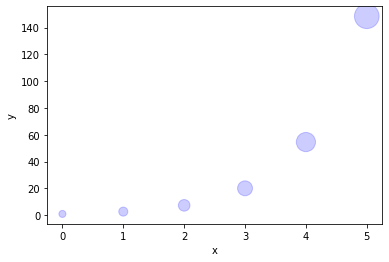

In [34]:
step = 1
x = np.arange(0, 5+step, step)      # An array 0, 1, 2, 3, 4, 5
y = np.exp(x)                       # An array of exp(0), exp(1), ..., exp(5)
z = np.sqrt(y)                      # An array of exp(0)**0.5, exp(5)**0.5

plt.scatter(x, y,                   # Specify the scatter plot by the x and y data
            s=z*50,                 # Dot sizes are specified by z*50
            c='b',                  # Color is blue
            alpha=0.2)              # Opacity is set to be 20%
plt.xlabel('x')                     # Label for x data
plt.ylabel('y')                     # Label for y data
plt.show()                          # Ready for display (optional for Jupyter)

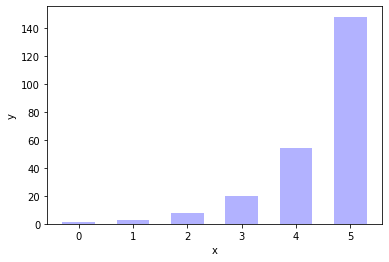

In [35]:
step = 1
x = np.arange(0, 5+step, step)      # An array 0, 1, 2, 3, 4, 5
y = np.exp(x)                       # An array of exp(0), exp(1), ..., exp(5)

plt.bar(x, y,                       # Specify the bar chart by the x and y data 
        width=0.6,                  # Bar width is 0.6
        color='b',                  # Color is blue
        alpha=0.3)                  # Opacity is 30%
plt.xlabel('x')                     # Label for x data
plt.ylabel('y')                     # Label for y data
plt.show()                          # Ready for display (optional for Jupyter)

Besides the attributes of plots, we may also adjust other features of the graph, as shown below.

<img src="https://github.com/XiongPengNUS/test/blob/master/Components.png?raw=true" width=600>

For example, the size of the figure can be configured by the keyword argument <code>figsize</code> when calling the function <code>figure</code>. The font size of x and y labels can be configured using the keyword argument <code>fontsize</code> while calling functions <code>xlabel()</code> and <code>ylabel()</code>.

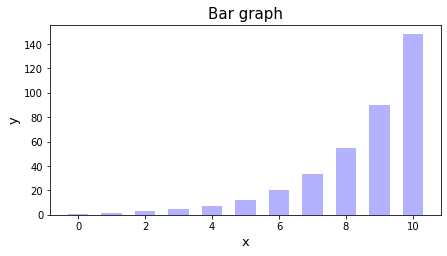

In [36]:
step = 1
x = np.arange(0, 10+step, step)     # An array 0, 1, 2, 3, 4, 5
y = np.exp(x/2)                     # An array of exp(0), exp(0.5), ..., exp(5)

plt.figure(figsize=(7, 3.5))        # Reconfigure the size of the figure
plt.title('Bar graph', fontsize=15) # Title of figure   
plt.bar(x, y,                       # Specify the bar chart by the x and y data 
        width=0.6,                  # Bar width is 0.6
        color='b',                  # Color is blue
        alpha=0.3)                  # Opacity is 30%
plt.xlabel('x', fontsize=13)        # Label for x data, the font size is 13
plt.ylabel('y', fontsize=13)        # Label for y data, the font size is 13
plt.show()                          # Ready for display (optional for Jupyter)

### Labeling plots and the function <code>legend()</code> <a id="subsection3.3"></a>

When multiple plots are being shown within a single graph, it can be useful to create a
plot legend that tells what these plots are. The Matplotlib package has a built-in function <code>legend()</code> to quickly create such a legend. Before calling the function <code>legend()</code>, please make sure that you have given a label to each plot you want to show in the legend box. This can be done by using the keyword argument <code>label</code>.

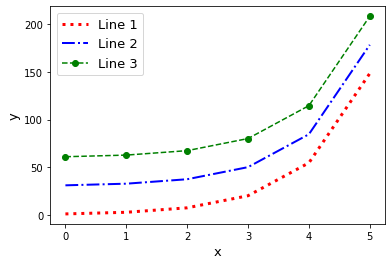

In [37]:
step = 1
x = np.arange(0, 5+step, step)                              # An array 0, 1, 2, 3, 4, 5
y = np.exp(x)                                               # An array exp(0),..., exp(5)

plt.plot(x, y, linewidth=3, linestyle=':', color='r',       # Specify the line features
         label='Line 1')                                    # Label of the line plot

plt.plot(x, y+30, linewidth=2, linestyle='-.', color='b',   # Specify the line features
         label='Line 2')                                    # Label of the line plot   

plt.plot(x, y+60, marker='o', linestyle='--', color='g',    # Specify the line features
         label='Line 3')                                    # Label of the line plot 

plt.legend(fontsize=13)                                     # Display the legend
plt.xlabel('x', fontsize=13)                                # Label for x data
plt.ylabel('y', fontsize=13)                                # Label for y data
plt.show()                          

<div class="alert alert-block alert-success">
    <b>Example 4:</b> Following the story in <b>Example 2</b>, the discrete distribution information of two types of newspapers is stored in the dictionary <b>distr_dict</b>. Use a bar graph to show the demands of these two types of newspapers under different weather conditions. 
</div>

In [38]:
distr_dict = {'weather': ['Sunny', 'Cloudy', 'Raining', 'Thunderstorm', 'Haze'],
              'probs': [0.315, 0.226, 0.289, 0.087, 0.083],
              'paper1': [560, 530, 389, 202, 278],
              'paper2': [533, 486, 386, 234, 263]}

distr_dict

{'weather': ['Sunny', 'Cloudy', 'Raining', 'Thunderstorm', 'Haze'],
 'probs': [0.315, 0.226, 0.289, 0.087, 0.083],
 'paper1': [560, 530, 389, 202, 278],
 'paper2': [533, 486, 386, 234, 263]}

In [39]:
weather = distr_dict['weather']
paper1 = distr_dict['paper1']
paper2 = distr_dict['paper2']

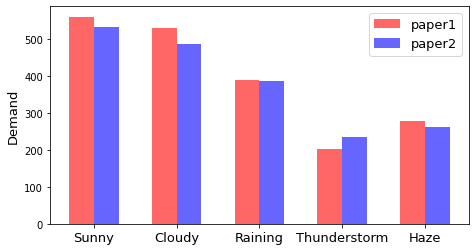

In [40]:
x = np.arange(len(weather))                 # An array 0, 1, 2, ..., 4
width = 0.3                                 # Width of the bar

plt.figure(figsize=(7.5, 4))
plt.bar(x-0.5*width, paper1, 
        color='r', width=width, alpha=0.6,
        label='paper1')                     # Bar chart for paper1
plt.bar(x+0.5*width, paper2, 
        color='b', width=width, alpha=0.6,
        label='paper2')                     # Bar chart for paper2

plt.legend(fontsize=13)
plt.xticks(x, weather, fontsize=13)    
plt.ylabel('Demand', fontsize=13)
plt.show()

## Case Studies: <a id="section4"></a>

### Case study 1: draw an 'elephant' with four parameters <a id="subsection4.1"></a>

It is shown in the paper *Drawing an elephant with four complex parameters* that we can draw an elephant according to the following equations.
$$
\begin{cases}
x = -30\sin(t) + 8\sin(2t) - 10\sin(3t) - 60\cos(t) \\
y = -50\sin(t) - 18\sin(2t) - 12\cos(3t) + 14\cos(5t) 
\end{cases}
$$
where $t$ is an array of numbers running from 0 to 2$\pi$. We may use the following code to draw the elephant. 

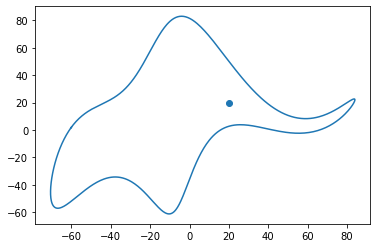

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
step = 0.01
t = np.arange(0,2*math.pi+step, step)
x = -30*np.sin(t)+8*np.sin(2*t)-10*np.sin(3*t)-60*np.cos(t)                             # An array 0, 1, 2, 3, 4, 5
y = -50*np.sin(t)-18*np.sin(2*t)-12*np.cos(3*t)+14*np.cos(5*t)                                               # An array exp(0),..., exp(5)

plt.plot(x, y)
plt.scatter(20,20)

### Case Study 2: daily stock returns <a id="subsection4.2"></a>
In this case study, we collected the daily close price data of five stocks: AAPL, AMZN, TSLA, FB, and GOOG, between Dec. 2020 and Jan. 2021. The dataset are formatted as a two-dimensional array as follows. 

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Prices of five stocks in two months (12-2020 to 01-2021)
#                [ AAPL,   AMZN,     TSLA,     FB,   GOOG   ]
data = np.array([[ 122.72, 3220.08,  584.76,  286.55, 1798.1 ],
                 [ 123.08, 3203.53,  568.82,  287.52, 1827.95],
                 [ 122.94, 3186.73,  593.38,  281.85, 1826.77],
                 [ 122.25, 3162.58,  599.04,  279.7 , 1827.99],
                 [ 123.75, 3158.  ,  641.76,  285.58, 1819.48],
                 [ 124.38, 3177.29,  649.88,  283.4 , 1818.55],
                 [ 121.78, 3104.2 ,  604.48,  277.92, 1784.13],
                 [ 123.24, 3101.49,  627.07,  277.12, 1775.33],
                 [ 122.41, 3116.42,  609.99,  273.55, 1781.77],
                 [ 121.78, 3156.97,  639.83,  274.19, 1760.06],
                 [ 127.88, 3165.12,  633.25,  275.55, 1767.77],
                 [ 127.81, 3240.96,  622.77,  275.67, 1763.  ],
                 [ 128.7 , 3236.08,  655.9 ,  274.48, 1747.9 ],
                 [ 126.66, 3201.65,  695.  ,  276.4 , 1731.01],
                 [ 128.23, 3206.18,  649.86,  272.79, 1739.37],
                 [ 131.88, 3206.52,  640.34,  267.09, 1723.5 ],
                 [ 130.96, 3185.27,  645.98,  268.11, 1732.38],
                 [ 131.97, 3172.69,  661.77,  267.4 , 1738.85],
                 [ 136.69, 3283.96,  663.69,  277.  , 1776.09],
                 [ 134.87, 3322.  ,  665.99,  276.78, 1758.72],
                 [ 133.72, 3285.85,  694.78,  271.87, 1739.52],
                 [ 132.69, 3256.93,  705.67,  273.16, 1751.88],
                 [ 129.41, 3186.63,  729.77,  268.94, 1728.24],
                 [ 131.01, 3218.51,  735.11,  270.97, 1740.92],
                 [ 126.6 , 3138.38,  755.98,  263.31, 1735.29],
                 [ 130.92, 3162.16,  816.04,  268.74, 1787.25],
                 [ 132.05, 3182.7 ,  880.02,  267.57, 1807.21],
                 [ 128.98, 3114.21,  811.19,  256.84, 1766.72],
                 [ 128.8 , 3120.83,  849.44,  251.09, 1746.55],
                 [ 130.89, 3165.89,  854.41,  251.64, 1754.4 ],
                 [ 128.91, 3127.47,  845.  ,  245.64, 1740.18],
                 [ 127.14, 3104.25,  826.16,  251.36, 1736.19],
                 [ 127.83, 3120.76,  844.55,  261.1 , 1790.86],
                 [ 132.03, 3263.38,  850.45,  267.48, 1886.9 ],
                 [ 136.87, 3306.99,  844.99,  272.87, 1891.25],
                 [ 139.07, 3292.23,  846.64,  274.5 , 1901.05],
                 [ 142.92, 3294.  ,  880.8 ,  278.01, 1899.4 ],
                 [ 143.16, 3326.13,  883.09,  282.05, 1917.24],
                 [ 142.06, 3232.58,  864.16,  272.14, 1830.79],
                 [ 137.09, 3237.62,  835.43,  265.  , 1863.11],
                 [ 131.96, 3206.2 ,  793.53,  258.33, 1835.74]])

In [42]:
print(data.ndim)        # This is a 2-dimensional array
print(data.shape)       # The shape of the array: 41 days and 5 stocks

2
(41, 5)


#### Trend of a selected stock

Visualize the trend of ONE selected stock. 

**Solution**:

Here we are using a `dict` type object to establish the mapping between the selected stock name and the column index of the two-dimensional array. In Lecture 7, we will learn the Pandas package which would enable us to directly access the column(s) via the selected column labels. The code above can be thus written in a more concise and readable way. 

#### Daily return in percentage

The daily return rate for a given day $n$ in percentage is expressed as

$$
R_p(n) = \frac{p_n - p_{n-1}}{p_{n-1}} \times 100\%
$$

where $n=2, 3, ...$. Create a two-dimensional array that gives the daily return rates of these five stocks during the given period. Visualize the trend of the daily return rates of ONE selected stock. 

**Solution**:

#### Daily log return

The daily log return for a given day $n$ is expressed as

$$
R_l(n) = \log\left(\frac{p_n}{p_{n-1}}\right)
$$

where $n=2, 3, ...$. Create a two-dimensional array that gives the daily log returns of these five stocks during the given period, and also visualize the trend of ONE stock. 

**Solution**:

### Daily returns of a portfolio

An investor manages a portfolio that is a combination of 
- 20% Apple
- 23% Amazon
- 16% Tesla
- 19% Facebook
- 22% Google

Visualize the daily return of the portfolio.

**Solution**:

In [43]:
pct = np.array([0.2, 0.23, 0.16, 0.19, 0.22])